In [1]:
#! pip install pandas
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8,4]
import networkx as nx

import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [2]:
data_f=pd.read_csv("price.csv")
data_f['Diff']=data_f['Price'].diff()
data_f.head()

,Day,Price,Diff
0,0,100.0,NaN
1,1,113.0,13.0
2,2,110.0,-3.0
3,3,85.0,-25.0
4,4,105.0,20.0


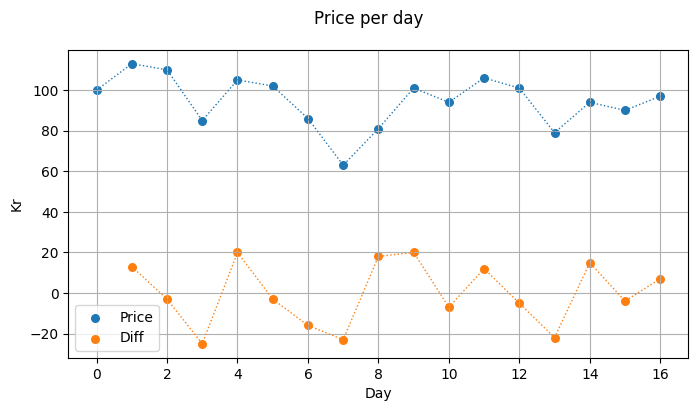

In [3]:
fig, ax = plt.subplots(1, 1)
fig.suptitle('Price per day')
ax.scatter(data_f['Day'], data_f['Price'], label="Price", s=30)
ax.scatter(data_f['Day'], data_f['Diff'], label="Diff", s=30)
ax.plot(data_f['Day'], data_f['Price'],linewidth=1, linestyle=":")
ax.plot(data_f['Day'], data_f['Diff'],linewidth=1, linestyle=":")
ax.set_xlabel('Day')
ax.set_ylabel('Kr')
ax.grid()
ax.legend()
#ax=data_f.plot( kind="scatter", marker="o",xlabel="day", ylabel="Kr", x = 'Day', y="Price", figsize=(8, 5), grid=True)

In [4]:
price=data_f['Price'].to_list()
diff_price=data_f['Diff'].to_list()

In [5]:
def walk_the_price(price):
    max=0
    buy_index=0
    sel_index=0
    for i in range(0,len(price)):
        for j in range(i+1, len(price)):
            diff=price[j]-price[i]
            if diff > max:
                max=diff
                buy_index=i
                sel_index=j
    return max, buy_index, sel_index

print(walk_the_price(price))            

def walk_the_diff_price(diff_price):
    max_sum=-1
    start_index=0
    end_index=0
    for i in range(0, len(diff_price)):
        sum=0
        for j in range(i,len(diff_price)):
            sum+=diff_price[j]
            if sum > max_sum:
                start_index=i
                end_index=j
                max_sum=sum
    return max_sum, start_index-1, end_index

print(walk_the_diff_price(diff_price))  
            
         

(43.0, 7, 11)
(43.0, 7, 11)


In [82]:
g = nx.DiGraph()

In [89]:
def find_cross_subarray(A,low, mid, high):
    #print(low,mid, high)
    #walk leftwards
    left_sum=int(-1e9)
    sum=0
    max_left=-1
    for i in range(mid,low-1,-1):
        sum+=A[i]
        if sum>left_sum:
            left_sum=sum
            max_left=i
            
    #walk rightwards
    right_sum=int(-1e9)
    sum_=0
    max_right=-1
    for j in range(mid+1,high+1):
        sum_+=A[j]
        if sum_>right_sum:
            right_sum=sum_
            max_right=j
    
    return (left_sum+right_sum), max_left, max_right

def find_max_subarray (A, low, high):
    if low==high:
        #print(A[low],low, high, A)
        return A[low],low, high
    else:
        mid= math.floor((low+high)/2)
        left_sum, left_low, left_high =find_max_subarray (A, low, mid)
        #plotting
        
              
        #print("left",left_sum, left_low, left_high )
        
        right_sum, right_low, right_high =find_max_subarray (A, mid+1, high)
        r=str(A[mid+1: high+1])
        #print("right",right_sum, right_low, right_high )
        cross_sum, cross_low, cross_high= find_cross_subarray(A,low,mid,high)
        c=str(A[cross_low: cross_high+1])
       
 
        #print("cross",cross_sum, cross_low, cross_high )
        case1=left_sum>= right_sum and left_sum>=cross_sum
        case2=right_sum>= left_sum and right_sum>=cross_sum
        if case1:
            return left_sum, left_low, left_high
        if case2:
            return right_sum, right_low, right_high
        if not case1 and not case2:
            return cross_sum, cross_low, cross_high
        

In [90]:
diff_price[0]=0
m, i, j =find_max_subarray(diff_price,0,len(diff_price)-1)
print("final", m, i-1,j)
#nx.draw(g, pos=nx.nx_pydot.pydot_layout(g, prog='dot'), node_color='w', edge_color='b', with_labels=True)


final 43.0 7 11
